# *Wine Quality Dataset*
O repositório foi escolhido por estes motivos:
1. Output claro: a variável ``quality`` já vem bem definida (valores de 0 à 10);
2. Problema flexível: é facilmente aplicável numa regressão para prever a qualidade, mas também para classificação entre vinho tinto e vinho branco!
3. Variáveis independentes: variáveis contínuas que, à primeira vista, aparentam não terem grandes correlações de um ponto de vista **lógico**, o que é bom para regressões.
4. Dataset **real** e moderadamente limpo, sem valores ausentes segundo o website.
5. Dataset de tamanho ideal e com importação já dividida para a variável alvo, facilitando o treinamento dos modelos de Machine Learning.

OBS: Vou utilizar diferentes cores para cada seção, para facilitar quando "scrollando" pelo arquivo ipynb. 


---

## <span style="color: pink;"> **1. Análise Eploratória de Dados** </span>

<span style="color: pink;"> === Importando Bibliotecas e Dataset ===


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Classificando os tipos de vinho em uma coluna type
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Juntando os datasets
df = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


---

### <span style="color: pink;"> **Analisando Distribuições (Histogramas)** 

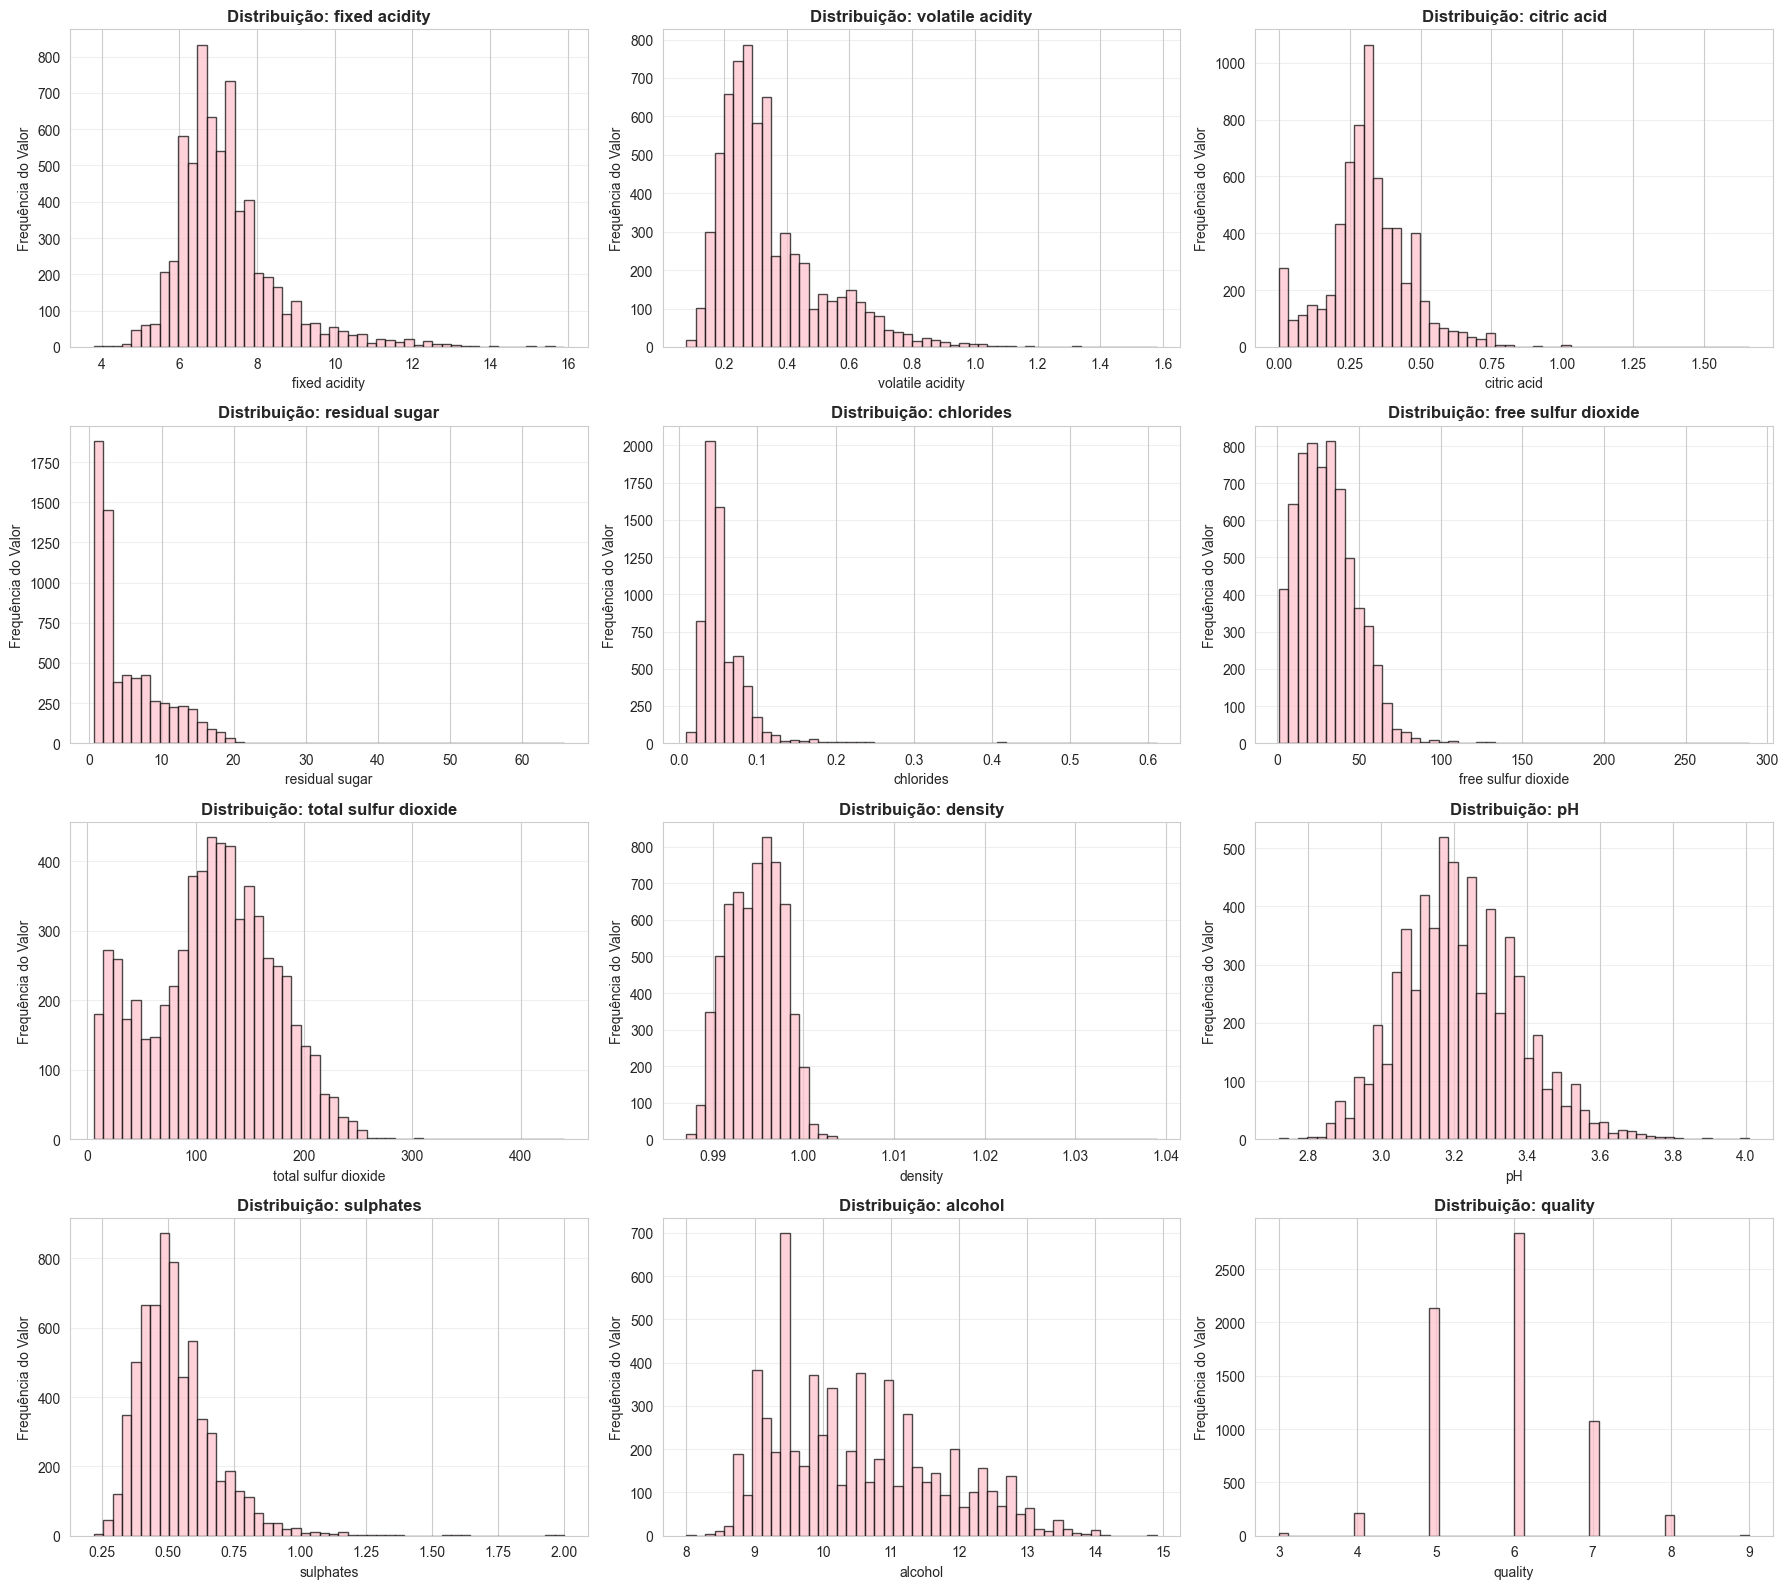

In [4]:
# Configuração de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel() # "achatando" os eixos unidimmensionalmente para iterar com apenas 1 loop for

numeric_cols = df.select_dtypes(include=[np.number]).columns # apenas as colunas numéricas

# Plots para cada coluna
for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7, color='pink')
    axes[idx].set_title(f'Distribuição: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequência do Valor')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<span style="color: pink;"> **Observações**:
- <span style="color: pink;"> *Assimetria*: Muitas variáveis químicas (como `residual_sugar`, `sulphates`, `total_sulfur_dioxide`) apresentam uma distribuição assimétrica, com cauda longa à direita. Isso indica que a maioria dos vinhos tem valores baixos, mas alguns têm valores extremamente altos (prováveis outliers)
- <span style="color: pink;"> *Qualidade*: Segue distribuição muito próxima da normal (picos centrais), concentrada entre 5-7, indicando que vinhos extremos (muito ruins ou excelentes) são raros
- <span style="color: pink;"> *pH e densidade*: Mostram distribuições um pouco mais simétricas, indicando que são características químicas mais estáveis

<span style="color: pink;"> A maior atenção aqui são as variáveis assimétricas, talvez seja necessário algum tipo de tratamento para treinar o modelo de Machine Learning com elas (normalizações ou funções logarítimicas)

---
### <span style="color: pink;"> **Análise de Outliers (Boxplots)** 

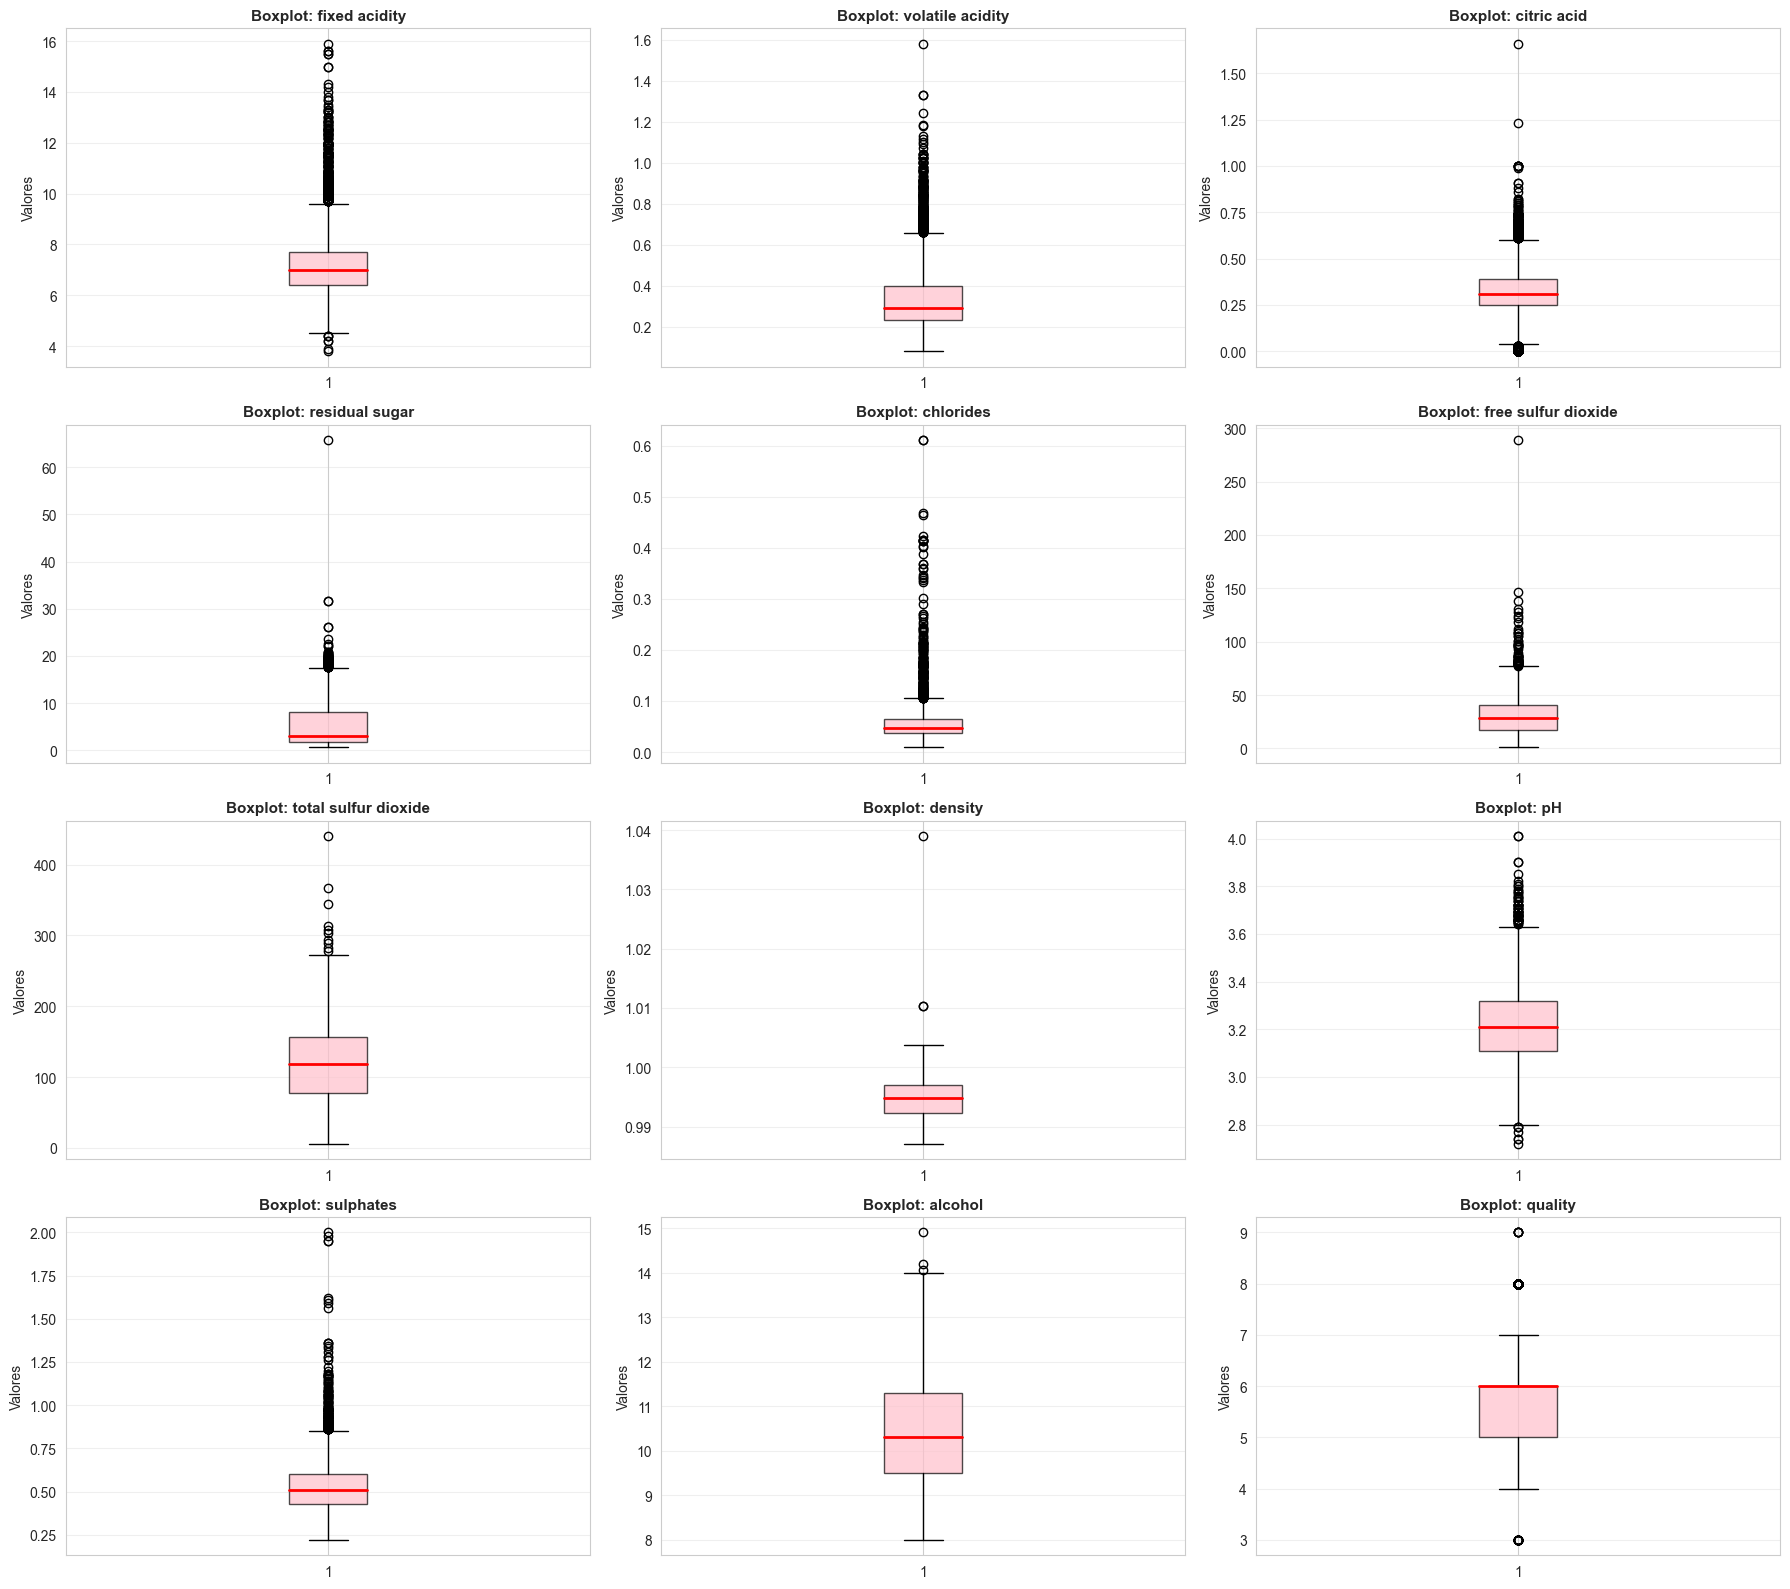

In [5]:
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='pink', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Boxplot: {col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Valores')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<span style="color: pink;"> **Observações:**

- <span style="color: pink;"> ***MUITOS*** *outliers*: Variáveis como `residual_sugar`, `chlorides`, `free_sulfur_dioxide` e `total_sulfur_dioxide` têm muitos pontos fora das caixas
- <span style="color: pink;"> ***Outliers não são erros***: No contexto de vinho, esses valores extremos podem representar vinhos únicos (vinhos doces com muito açúcar residual, por exemplo), não são erros necessariamente

<span style="color: pink;"> **O que fazer então?**

- <span style="color: pink;"> Não removerei todos os outliers - eles podem ser legítimos e dão variabilidade aos nossos dados
- <span style="color: pink;"> Tentarei usar métodos robustos a outliers (Tratamento IQR)
- <span style="color: pink;"> Outliers em variáveis químicas provavelmente indicam diferentes estilos de vinho.

---




### <span style="color: pink;"> **Tratando Outliers (IQR)**

<span style="color: pink;">  O método de identificação de interquartis tira proveito do conceito dos boxplots e "cerca" os dados para definir outliers fora de certo alcance. A imagem abaixo  *(fonte: https://www.scribbr.com/statistics/outliers/)* explica visualmente a lógica:

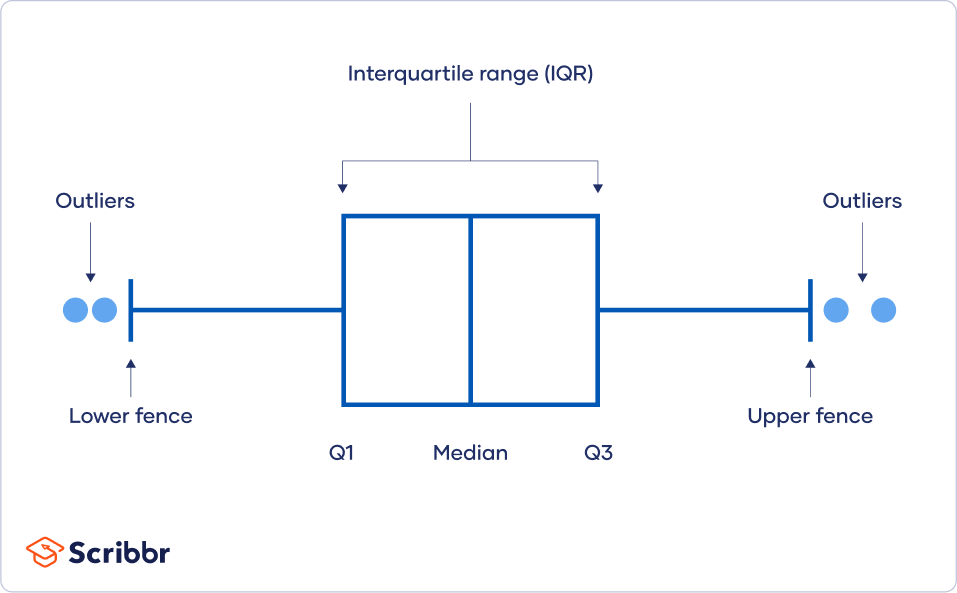

In [ ]:
def outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    
    
    outliers_inferiores = df[df[column] < lower_fence] 
    outliers_superiores = df[df[column] > upper_fence]
    return len(outliers_inferiores), len(outliers_superiores), lower_fence, upper_fence

<span style="color: pink;"> A função acima aplica a lógica de IQR para encontrar a quantidade de outliers, agora, vamos analisá-los: 

In [17]:
outlier_arr = []
for col in numeric_cols:
    n_outliers_inf, n_outliers_sup, lf, uf = outliers_IQR(df, col)
    outlier_arr.append({
        'Variável': col,
        'Num Outliers Inf': n_outliers_inf,
        'Num Outliers Sup': n_outliers_sup,
        'Limite Inferior': round(lf, 2),
        'Limite Superior': round(uf, 2)
    })

outlier_df = pd.DataFrame(outlier_arr)
outlier_df

,Variável,Num Outliers Inf,Num Outliers Sup,Limite Inferior,Limite Superior
0,fixed acidity,7,350,4.45,9.65
1,volatile acidity,0,377,-0.02,0.66
2,citric acid,279,230,0.04,0.60
3,residual sugar,0,118,-7.65,17.55
4,chlorides,0,286,-0.00,0.11
5,free sulfur dioxide,0,62,-19.00,77.00
6,total sulfur dioxide,0,10,-41.50,274.50
7,density,0,3,0.99,1.00
8,pH,7,66,2.80,3.64
9,sulphates,0,191,0.18,0.86


<span style="color: pink;"> Há algumas observações principais a serem feitas:

- <span style="color: pink;"> *Limites Inferiores*: alguns limites ficaram com valores negativos por conta da distribuição e formato dos dados em valores muito baixos, mas isso não influencia na identificação de outliers, pois significa que se o valor é baixo, muito provavelmente está dentro dos quartis desejados e não foi identificado nenhum valor negativo, o que reforça que o dataset trabalha com dados reais.

- <span style="color: pink;"> *Acidez Fixa e Acidez Volátil*: apesar de aparentarem terem muitos outliers, estes são valores que não queremos remover. Após uma breve pesquisa sobre o que cada uma representa no vinho e analisar nossos histogramas, todos os valores parecem plausíveis e dentro da normalidade. Serão "outliers" muito interessantes de se analisar, pois em níveis muito baixos (geralmente abaixo de 0,6-0,9 g/L, que é o caso da maioria do dataset), pode contribuir para a complexidade e frescor. No entanto, em excesso (os 377 outliers), confere aromas indesejáveis de vinagre, aceto balsâmico, verniz ou cola, comprometendo a qualidade e o aroma do vinho, ou seja, poderemos investigar se os vinhos muito ácidos recebem avaliações piores ou não.

- <span style="color: pink;"> *pH*: é o único campo que **talvez** seja justificável remover ou substituir outliers, mais especificamente os inferiores. A faixa geral de pH no vinho segundo pesquisas que fiz no google é de 2,5 a 4,5, com vinhos brancos tendo pH mais baixo, em torno de 3,0 a 3,5 e vinhos tintos com pH mais alto, em torno de 3,5 a 4,0. Seria possível substituir os pH's abaixo de 2,5 por esse limite, mas são tão poucos que não acho que vão influenciar no resultado final. Quanto aos valores acima da nossa cerca, provavelmente são normais tendo em vista a pesquisa que fiz.

- <span style="color: pink;"> *Outras Variáveis*: É normal haverem vinhos cítricos e não-cítricos, mais doces ou mais amargos, etc, então muitos valores não-citados que foram classificados como outliers aqui provavelmente são apenas tipos únicos de vinho.

<span style="color: pink;"> **Conclusão**: antes me assustei com os boxplots, mas a verdade é que os vinhos do dataset são extremamente variados, estando em sua maioria com valores dentro da variabilidade normal para vinhos segundo minhas buscas no google. Então, decidi que não vou remover outliers, mas será necessário transformar as escalas de alguns valores, como já mencionei antes.

In [ ]:
# def remover_outliers_IQR(df, column):
#     n_outliers, lf, uf = outliers_IQR(df, col)
#     df[column] = df[column].clip(lower=lf, upper=uf)